# CLustring & Fitting

**CO2 Emissions Analysis and Prediction**

Data Loading and Initial Exploration

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'D:\\Data Science\\University of Hertfordshire\\Applied Data Sceince\Assignment 2\\co2_emissions_kt_by_country.csv'
data = pd.read_csv(file_path)


print("First few rows of the dataset:")
print(data.head())


print("\nData Info:")
print(data.info())


print("\nSummary Statistics:")
print(data.describe(include='all'))


print("\nMissing Values Check:")
print(data.isnull().sum())

First few rows of the dataset:
  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
None

Summary Statistics:
       country_code country_name          year         value
count         13953        13953  13953.000000  1.395300e+04
unique          255          256           NaN           NaN
top             LBY    St. Lucia           NaN  

Data Cleaning and Preprocessing

In [2]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
data['normalized_value'] = scaler.fit_transform(data[['value']])


data = data.drop('country_code', axis=1)


print("Cleaned Data Sample:")
print(data.head())

print("\nUpdated Data Info:")
print(data.info())

Cleaned Data Sample:
  country_name  year      value  normalized_value
0        Aruba  1960  11092.675          0.000325
1        Aruba  1961  11576.719          0.000339
2        Aruba  1962  12713.489          0.000373
3        Aruba  1963  12178.107          0.000357
4        Aruba  1964  11840.743          0.000347

Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_name      13953 non-null  object 
 1   year              13953 non-null  int64  
 2   value             13953 non-null  float64
 3   normalized_value  13953 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 436.2+ KB
None


Data Visualization (Categorical Graph)

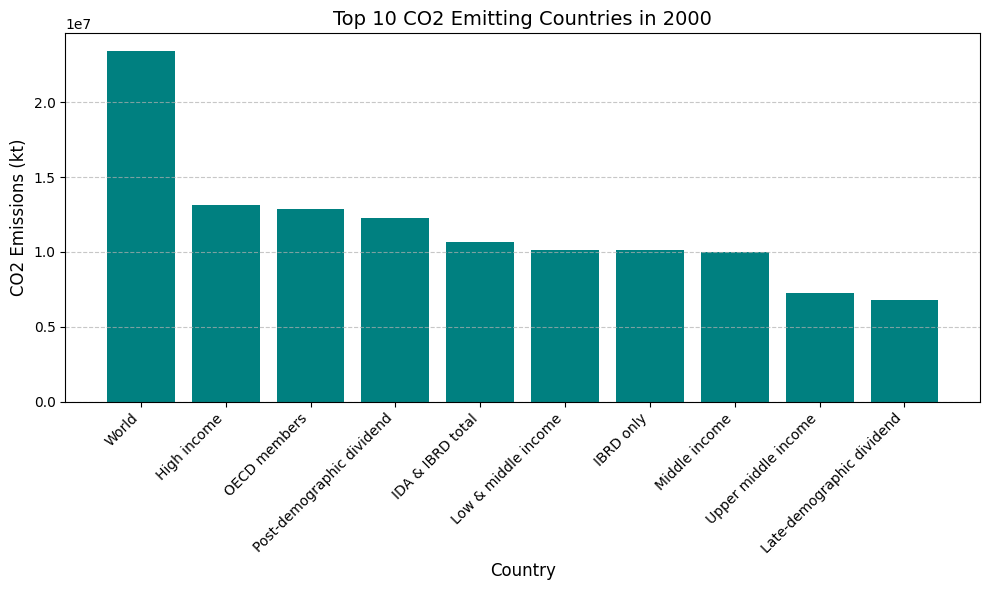

In [3]:
import matplotlib.pyplot as plt

def plot_categorical_graph(data, year):
    """
    Create a bar chart comparing CO2 emissions for selected countries in a specific year.
    """

    year_data = data[data['year'] == year].nlargest(10, 'value')  # Top 10 countries by emissions


    plt.figure(figsize=(10, 6))
    plt.bar(year_data['country_name'], year_data['value'], color='teal')
    plt.title(f'Top 10 CO2 Emitting Countries in {year}', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('CO2 Emissions (kt)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_categorical_graph(data, 2000)

Relational Graph (Scatter Plot)

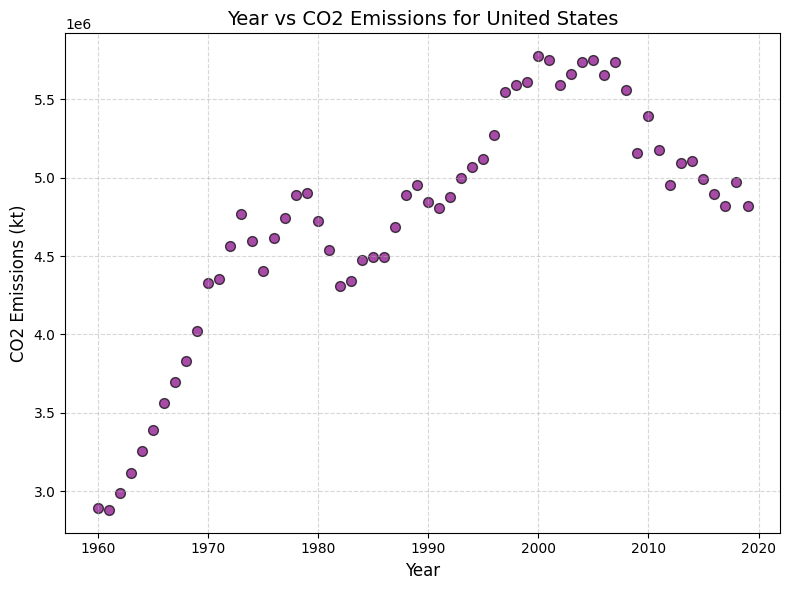

In [4]:
def plot_relational_graph(data, country_name):
    """
    Create a scatter plot to show the relationship between year and CO2 emissions for a specific country.
    """

    country_data = data[data['country_name'] == country_name]


    plt.figure(figsize=(8, 6))
    plt.scatter(country_data['year'], country_data['value'], alpha=0.7, color='purple', edgecolor='k', s=50)
    plt.title(f'Year vs CO2 Emissions for {country_name}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('CO2 Emissions (kt)', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()


plot_relational_graph(data, 'United States')

Statistical Graph (Boxplot)

<Figure size 800x600 with 0 Axes>

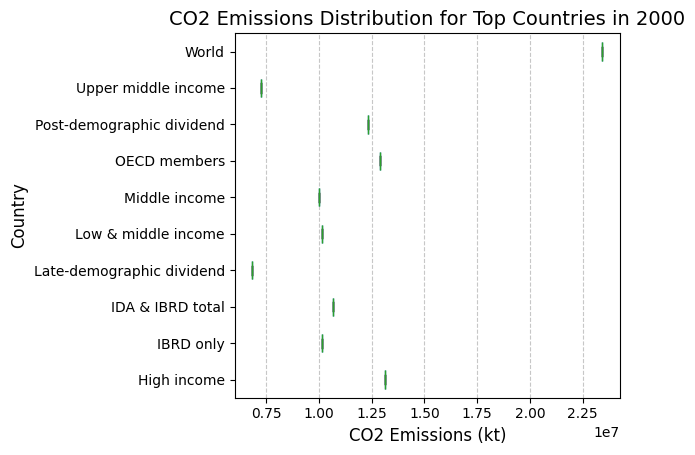

In [5]:
def plot_boxplot(data):
    """
    Create a boxplot comparing CO2 emissions across groups (e.g., income categories or country groups).
    """

    year = 2000
    selected_countries = data[data['year'] == year].nlargest(10, 'value')  # Top 10 countries by emissions

    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    selected_countries.boxplot(column='value', by='country_name', grid=False, patch_artist=True, vert=False)
    plt.title(f'CO2 Emissions Distribution for Top Countries in {year}', fontsize=14)
    plt.suptitle('')  # Remove the default boxplot title
    plt.xlabel('CO2 Emissions (kt)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_boxplot(data)

Clustering Analysis

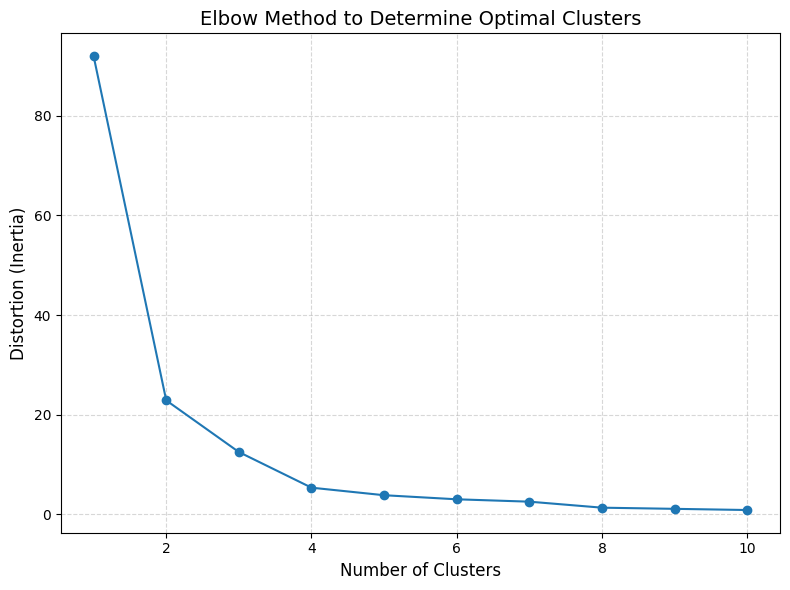

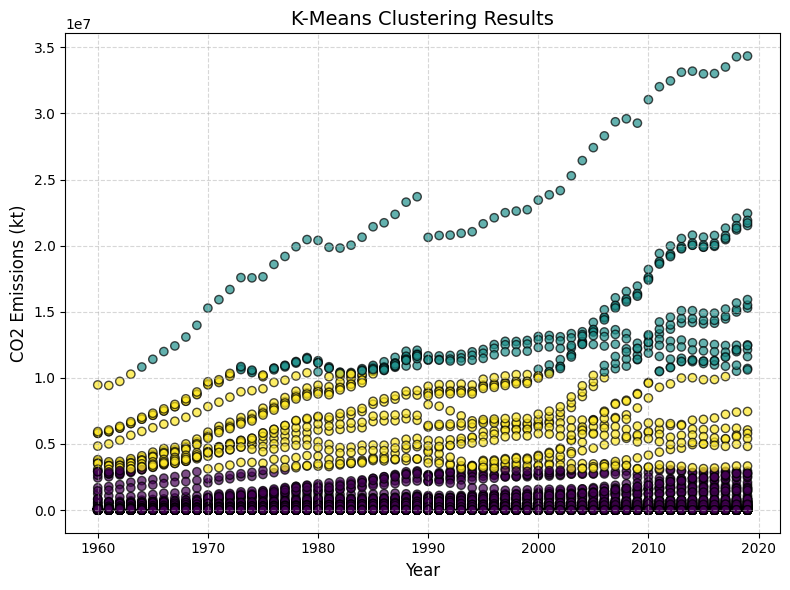

In [6]:
from sklearn.cluster import KMeans
import numpy as np

def perform_clustering(data):
    """
    Perform k-means clustering on normalized CO2 emissions.
    """

    clustering_features = ['normalized_value']
    X = data[clustering_features]


    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)


    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method to Determine Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion (Inertia)', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Perform k-means clustering with the optimal number of clusters (e.g., k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['cluster'] = kmeans.fit_predict(X)

    # Visualize clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(data['year'], data['value'], c=data['cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
    plt.title('K-Means Clustering Results', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('CO2 Emissions (kt)', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

# Call the function to perform clustering
perform_clustering(data)

Regression Analysis (Line Fitting)

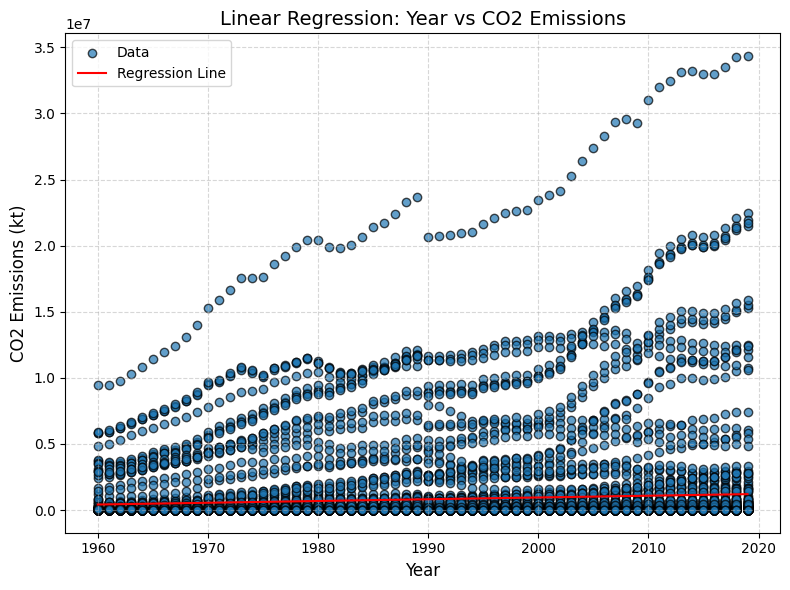

Regression Coefficient (Slope): 13316.689106401393
Intercept: -25684464.997970868
Mean Squared Error (MSE): 7725152147638.21
R² Score: 0.01


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def perform_regression(data):
    """
    Perform linear regression on year and CO2 emissions.
    """
    # Prepare data for regression
    X = data[['year']]  # Independent variable
    y = data['value']  # Dependent variable

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Plot the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label='Data', edgecolor='k')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title('Linear Regression: Year vs CO2 Emissions', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('CO2 Emissions (kt)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Display regression metrics
    print(f"Regression Coefficient (Slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_pred):.2f}")
    print(f"R² Score: {r2_score(y, y_pred):.2f}")

# Call the function to perform regression
perform_regression(data)

Future Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Future Predictions:
   Year  Predicted CO2 Emissions (kt)
0  2025                       1281830
1  2030                       1348413
2  2035                       1414997
3  2040                       1481580


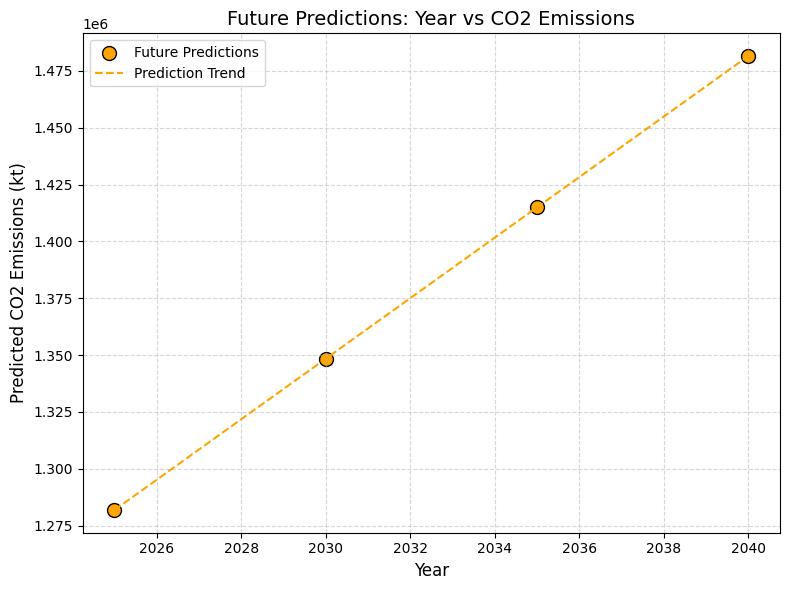

In [9]:
def predict_future_emissions_with_new_color(model):
    """
    Predict future CO2 emissions for hypothetical years with a unique color scheme.
    """
    # Define future years
    future_years = [[2025], [2030], [2035], [2040]]
    predictions = model.predict(future_years)

    # Create a DataFrame to display predictions
    future_data = pd.DataFrame({
        'Year': [year[0] for year in future_years],
        'Predicted CO2 Emissions (kt)': predictions.astype(int)
    })

    print("Future Predictions:")
    print(future_data)

    # Visualize future predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(future_data['Year'], future_data['Predicted CO2 Emissions (kt)'],
                color='orange', s=100, label='Future Predictions', edgecolor='k')
    plt.plot(future_data['Year'], future_data['Predicted CO2 Emissions (kt)'],
             color='orange', linestyle='--', label='Prediction Trend')
    plt.title('Future Predictions: Year vs CO2 Emissions', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Predicted CO2 Emissions (kt)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()


model = LinearRegression()
X = data[['year']]  # Independent variable
y = data['value']  # Dependent variable
model.fit(X, y)


predict_future_emissions_with_new_color(model)